<a href="https://colab.research.google.com/github/Nimagna123/TwitterCommentClassifier/blob/main/Twitter_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import numpy as np 
import pandas as pd 
from time import time
from keras.models import Sequential
from keras import layers
from sklearn.metrics import accuracy_score,f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv1D
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


In [105]:
path = 'https://drive.google.com/uc?export=download&id=1R6UJi1bAeDAPURXJrCSRtFvyMaXy4xtE'
data = pd.read_csv(path)
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,2
2,088c60f138,my boss is bullying me...,bullying me,2
3,9642c003ef,what interview! leave me alone,leave me alone,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",2


In [106]:
data.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [107]:
data.shape


(27481, 4)

In [108]:
data = data[['text', 'sentiment']]

In [109]:
data['text'] = data['text'].str.lower()

In [110]:
from nltk.corpus import stopwords
import nltk

In [111]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
stopwords_list = stopwords.words('english')


In [113]:
", ".join(stopwords.words('english'))


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [114]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_list])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0                               i`d responded, going
1                         sooo sad miss san diego!!!
2                                boss bullying me...
3                             interview! leave alone
4    sons ****, couldn`t put releases already bought
Name: text, dtype: object

In [115]:
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].head()

0                           id responded going
1                      sooo sad miss san diego
2                             boss bullying me
3                        interview leave alone
4    sons  couldnt put releases already bought
Name: text, dtype: object

In [116]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
data['text']= data['text'].apply(lambda x: cleaning_repeating_char(x))

In [117]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)
data['text']= data['text'].apply(lambda x: cleaning_email(x))

In [118]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
data['text']= data['text'].apply(lambda x: cleaning_URLs(x))

In [119]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text']= data['text'].apply(lambda x: cleaning_numbers(x))

In [120]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()

0                             [id, responded, going]
1                         [so, sad, mis, san, diego]
2                                 [bos, bulying, me]
3                          [interview, leave, alone]
4    [sons, couldnt, put, releases, already, bought]
Name: text, dtype: object

In [121]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0                               [id, respond, go]
1                       [so, sad, mi, san, diego]
2                                  [bo, buli, me]
3                         [interview, leav, alon]
4    [son, couldnt, put, releas, alreadi, bought]
Name: text, dtype: object

In [122]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [123]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

0                               [id, respond, go]
1                       [so, sad, mi, san, diego]
2                                  [bo, buli, me]
3                         [interview, leav, alon]
4    [son, couldnt, put, releas, alreadi, bought]
Name: text, dtype: object

In [124]:
X = data['text']
X

0                                        [id, respond, go]
1                                [so, sad, mi, san, diego]
2                                           [bo, buli, me]
3                                  [interview, leav, alon]
4             [son, couldnt, put, releas, alreadi, bought]
                               ...                        
27476    [wish, could, come, se, u, denver, husband, lo...
27477    [ive, wonder, rake, to, client, made, clear, n...
27478    [yay, god, you, enjoy, break, probabl, ned, he...
27479                                              [worth]
27480                    [flirt, go, atg, smile, yay, hug]
Name: text, Length: 27481, dtype: object

In [125]:
Y = data['sentiment']
Y

0        0
1        2
2        2
3        2
4        2
        ..
27476    2
27477    2
27478    1
27479    1
27480    0
Name: sentiment, Length: 27481, dtype: int64

In [126]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
maxlen = 100
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

In [127]:
Y.unique()

array([0, 2, 1])

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
Y_train = to_categorical(Y_train)

X
#Tokenizer
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

#Padding
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train

array([[  70,  564,   46, ...,    0,    0,    0],
       [ 111,  392,    4, ...,    0,    0,    0],
       [ 112,  164,  425, ...,    0,    0,    0],
       ...,
       [ 214, 1096,  140, ...,    0,    0,    0],
       [  95,   98,    0, ...,    0,    0,    0],
       [  26,    1,   22, ...,    0,    0,    0]], dtype=int32)

**MLP**

In [133]:
def mlp_keras(activation,optimizer,epochs,batchsize):
  embedding_dim = 100

  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim,
                            input_length=maxlen))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(30, activation=activation))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation=activation))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(3, activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, np.asarray(Y_train).astype(np.float32),
                    epochs=epochs,
                    verbose=0,
                    batch_size=batchsize)
  
  return model

In [135]:
t0 = time()
model = mlp_keras('relu','RMSprop', 5, 32)
pred = np.argmax(model.predict(X_test), axis=-1)
t1 = time()

MLP_accuracy = accuracy_score(y_pred=pred, y_true=Y_test)
MLP_f1_score = f1_score(y_pred=pred, y_true=Y_test, average="weighted")
MLP_time = t1 - t0
print("MLP Accuracy = ",MLP_accuracy)
print("MLP F1 Score = ",MLP_f1_score)
print("MLP Time taken = ", MLP_time)

MLP Accuracy =  0.7161916312916919
MLP F1 Score =  0.7150377724707253
MLP Time taken is  41.98623061180115


**CNN**

In [142]:
def cnn_keras(activation,optimizer,epochs,batchsize):
  embedding_dim = 100

  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                          output_dim=embedding_dim,
                          input_length=maxlen))

  model.add(Conv1D(32, kernel_size=2, activation=activation))
  model.add(layers.MaxPooling1D(2))
  model.add(Conv1D(32, kernel_size=2, activation=activation))
  model.add(Dropout(0.25))
  model.add(Conv1D(16, kernel_size=2, activation=activation))
  model.add(layers.MaxPooling1D(2))
  model.add(Conv1D(16, kernel_size=2, activation=activation))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(64, activation='tanh'))
  model.add(Dropout(0.5))

  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, Y_train,
                    epochs=epochs,
                    verbose=0,
                    batch_size=batchsize)
  
  return model

In [154]:
t0 = time()
model = cnn_keras('elu','RMSprop', 5, 8)
pred = np.argmax(model.predict(X_test), axis=-1)
t1 = time()

CNN_accuracy = accuracy_score(y_pred=pred, y_true=Y_test)
CNN_f1_score = f1_score(y_pred=pred, y_true=Y_test, average="weighted")
CNN_time = t1 - t0
print("CNN Accuracy = ",CNN_accuracy)
print("CNN F1 Score = ",CNN_f1_score)
print("CNN Time taken = ", CNN_time)

CNN Accuracy =  0.6927835051546392
CNN F1 Score =  0.6925277223405786
CNN Time taken =  89.31533813476562


**RNN**

In [147]:
def rnn_keras(activation,optimizer,epochs,batchsize):
  embedding_dim = 100

  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                          output_dim=embedding_dim, 
                          input_length=maxlen))
  model.add(layers.SimpleRNN(64))
  model.add(Dense(3,activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, Y_train,
                    epochs=epochs,
                    verbose=0,
                    batch_size=batchsize)
  
  return model

In [155]:
t0 = time()
model = rnn_keras('tanh','RMSprop', 5, 8)
pred = np.argmax(model.predict(X_test), axis=-1)
t1 = time()

RNN_accuracy = accuracy_score(y_pred=pred, y_true=Y_test)
RNN_f1_score = f1_score(y_pred=pred, y_true=Y_test, average="weighted")
RNN_time = t1 - t0
print("RNN Accuracy = ",RNN_accuracy)
print("RNN F1 Score = ",RNN_f1_score)
print("RNN Time taken = ", RNN_time)

RNN Accuracy =  0.3764705882352941
RNN F1 Score =  0.31149252135244543
RNN Time taken =  1870.852412223816


**LSTM**

In [148]:
def lstm_keras(activation,optimizer,epochs,batchsize):
  embedding_dim = 100

  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                          output_dim=embedding_dim, 
                          input_length=maxlen))
  model.add(SpatialDropout1D(0.4))
  model.add(LSTM(64, activation=activation))
  model.add(Dense(3,activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, Y_train,
                    epochs=epochs,
                    verbose=0,
                    batch_size=batchsize)
  
  return model

In [153]:
t0 = time()
model = lstm_keras('tanh','adam', 5, 16)
pred = np.argmax(model.predict(X_test), axis=-1)
t1 = time()

LSTM_accuracy = accuracy_score(y_pred=pred, y_true=Y_test)
LSTM_f1_score = f1_score(y_pred=pred, y_true=Y_test, average="weighted")
LSTM_time = t1 - t0
print("LSTM Accuracy = ",LSTM_accuracy)
print("LSTM F1 Score = ",LSTM_f1_score)
print("LSTM Time taken = ", LSTM_time)

LSTM Accuracy =  0.408853850818678
LSTM F1 Score =  0.2373013655492017
LSTM Time taken =  183.06055998802185


In [159]:
output=[]
output.append(['MLP',MLP_accuracy,MLP_f1_score,MLP_time])
output.append(['CNN',CNN_accuracy,CNN_f1_score,CNN_time])
output.append(['RNN',RNN_accuracy,RNN_f1_score,RNN_time])
output.append(['LSTM',LSTM_accuracy,LSTM_f1_score,LSTM_time])
outputDataframe = pd.DataFrame(output, columns = ['Model Name', 'Testing Accuracy','F1 Accuracy','Training Time']) 

In [160]:
outputDataframe

,Model Name,Testing Accuracy,F1 Accuracy,Training Time
0,MLP,0.716192,0.715038,41.986231
1,CNN,0.692784,0.692528,89.315338
2,RNN,0.376471,0.311493,1870.852412
3,LSTM,0.408854,0.237301,183.060560


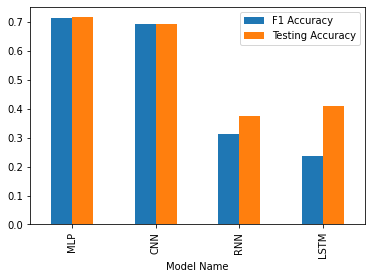

In [162]:
ax = outputDataframe.plot.bar(x='Model Name', y={'Testing Accuracy','F1 Accuracy'})

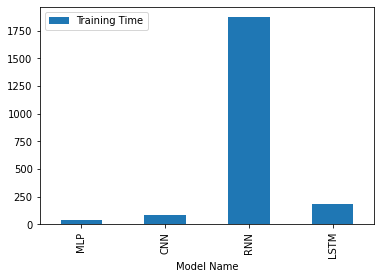

In [163]:
ax = outputDataframe.plot.bar(x='Model Name', y={'Training Time'})